# Data Wrangling

## Handling Outliers and Missing Data
### DataSource: from https://packt.live/2YajrLJ
This file contains data generated by a random data generator, and it contains people's names. their gender, email, ip_address and the number of visits they made to a particular web page

In [3]:
# Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read the csv file
df = pd.read_csv("datasets/visit_data.csv")

In [5]:
# Print the data from the dataframe
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


As we can see, there is date where some values are missing, and if we examine this, we will see some outliers.

In [7]:
# Check for duplicates
print("First name is duplicated - {}".format(any(df.first_name.duplicated())))
print("Last name is duplicated - {}".format(any(df.last_name.duplicated())))
print("Email is duplicated - {}".format(any(df.email.duplicated())))

First name is duplicated - True
Last name is duplicated - True
Email is duplicated - False


There are some duplicates in both the first and last names, which is normal. However, as we can see, there are no duplicates in email. That's good.

In [9]:
# Notice that we have different ways to format boolean values for the % op-erator
# Check if there are any NaN values
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


The Visit column contains some NaN values. Given that the final task at hand will probably be predicting the number of visits, we cannot do anything with rows that do not have that information. They are a type of outlier. Lets get rid of them.

In [11]:
# There are various ways to do this. This is just one way. We encourage you to explore other ways.
# But before that we need to store the previous size of the data set and we will compare it with the new size
size_prev = df.shape
df = df[np.isfinite(df['visit'])] #This is an inplace operation. After this operation the original DataFrame is lost.
size_after = df.shape

In [12]:
# Notice how parameterized format is used and then the indexing is working inside the quote marks
# Report the size difference
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
format(prev=size_prev, after=size_after))

The size of previous data was - 1000 rows and the size of the new one is - 974 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x274a6e5b3b0>,
 'caps': [<matplotlib.lines.Line2D at 0x274a6f34530>,
 'boxes': [<matplotlib.lines.Line2D at 0x274a6d3da00>],
 'medians': [<matplotlib.lines.Line2D at 0x274a6f34b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x274a6f34e90>],
 'means': []}

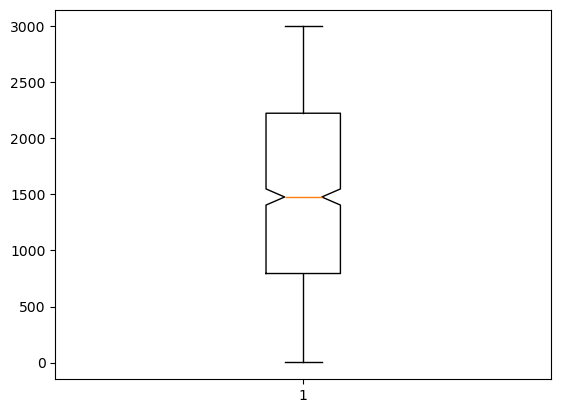

In [13]:
# Plot a box to find whether the data has outliers
plt.boxplot(df.visit, notch=True)

As we can see , we have data in column in the interval(0, 3000). However, the main concentration of the data is between ~700 and ~2300.

In [15]:
# Get rid of values beyond 2900 and below 100 - these are outliers for us. We need to get rid of them
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]  # Notice the power-ful & operator
# Here we abuse the fact the number of variable can be greater than the num-ber of replacement targets
print("After getting rid of outliers the new size of the data is - {}".format(*df1.shape))

After getting rid of outliers the new size of the data is - 923
